In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/dataset/data.csv')

# **Feature Descriptions**

**Age:** A continuous variable representing the age of the individual.

**Gender:** A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

**Education:** A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

**Interest:** A categorical variable representing the individual's primary area of interest.

**Introversion Score:** A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

**Sensing Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

**Thinking Score:** A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

**Judging Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

**Personality:** Target that contains People Personality Type


In [3]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
df.shape

(128061, 9)

In [5]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


# **Based on the dataset, it includes the following columns:**

* Age (Continuous, Numeric)
* Gender (Categorical)
* Education (Categorical, encoded as integers)
* Introversion Score (Continuous, Numeric)
* Sensing Score (Continuous, Numeric)
* Thinking Score (Continuous, Numeric)
* Judging Score (Continuous, Numeric)
* Interest (Categorical)
* Personality (Categorical)

# **UNIVARIATE ANALYSIS**

In [7]:
age = df['Age']

print("Mean:", age.mean())
print("Median:", age.median())
print("Mode:", age.mode()[0])
print("Variance:", age.var())
print("Standard Deviation:", age.std())
print("Range:", age.max() - age.min())

Mean: 26.349091448606522
Median: 25.0
Mode: 22.0
Variance: 24.088683951186905
Standard Deviation: 4.908022407363979
Range: 39.0


The mean age is 26.35 years, and majority of people in the dataset are around 22 years old (mode). The age distribution has a variance of 24.09, indicating moderate spread, with a standard deviation of about 4.91 years

In [8]:
introvertion = df['Introversion Score']
print("Mean:", introvertion.mean())
print("Median:", introvertion.median())
print("Mode:", introvertion.mode()[0])
print("Variance:", introvertion.var())
print("Standard Deviation:", introvertion.std())
print("Range:", introvertion.max() - introvertion.min())
print()

sensing = df['Sensing Score']
print("Mean:", sensing.mean())
print("Median:", sensing.median())
print("Mode:", sensing.mode()[0])
print("Variance:", sensing.var())
print("Standard Deviation:", sensing.std())
print("Range:", sensing.max() - sensing.min())
print()

thinking = df['Thinking Score']
print("Mean:", thinking.mean())
print("Median:", thinking.median())
print("Mode:", thinking.mode()[0])
print("Variance:", thinking.var())
print("Standard Deviation:", thinking.std())
print("Range:", thinking.max() - thinking.min())
print()

judging = df['Judging Score']
print("Mean:", judging.mean())
print("Median:", judging.median())
print("Mode:", judging.mode()[0])
print("Variance:", judging.var())
print("Standard Deviation:", judging.std())
print("Range:", judging.max() - judging.min())


Mean: 4.996386557499942
Median: 4.99364
Mode: 0.8524
Variance: 8.344218410805018
Standard Deviation: 2.8886360814067626
Range: 9.99995

Mean: 5.081892569676081
Median: 5.124168779883422
Mode: 0.0
Variance: 1.4000481682265022
Standard Deviation: 1.1832363112356308
Range: 9.788814729835853

Mean: 4.98804024691358
Median: 4.98418
Mode: 0.0805
Variance: 8.329102503399305
Standard Deviation: 2.886018451673396
Range: 9.99992

Mean: 4.578292726225024
Median: 4.690653265067365
Mode: 0.0
Variance: 1.9364993843447924
Standard Deviation: 1.3915816125347418
Range: 9.840493885587865


These scores are measured on a scale of 0 to 10. The mean for these scores hovers around 5, with standard deviations between 1.18 and 2.89, indicating variability in personality traits. The range for these traits shows that individuals are spread across almost the entire scale (near 10).

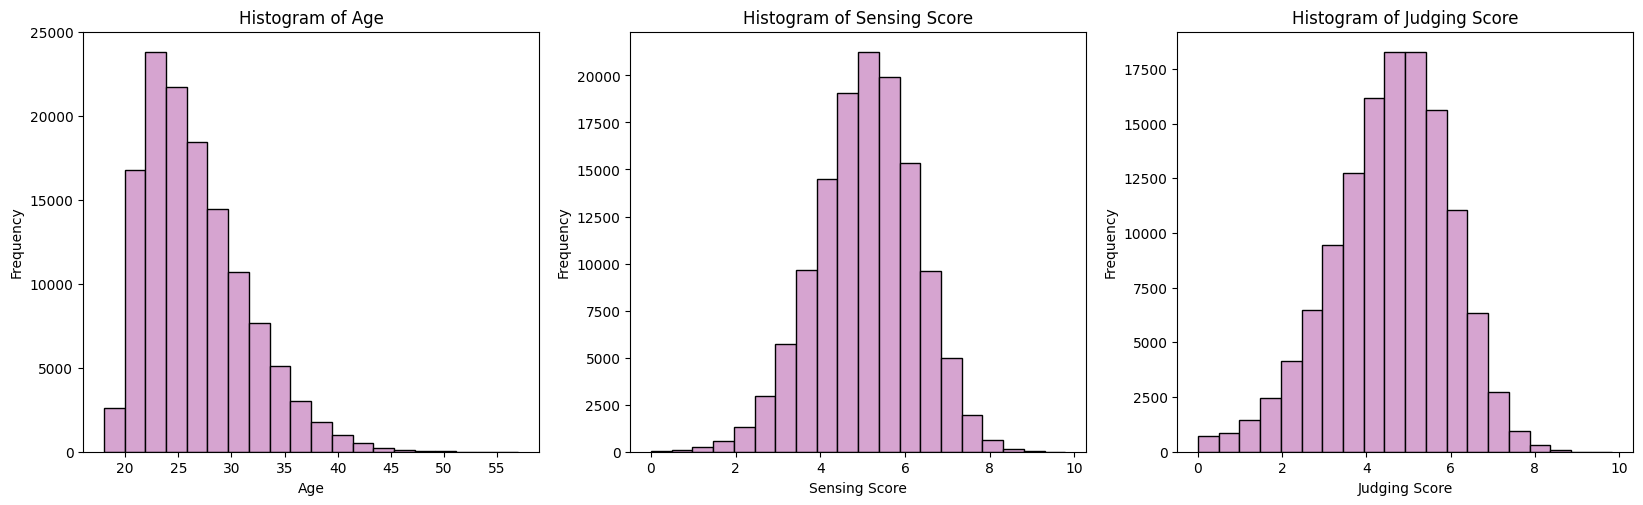

In [9]:
continuous_columns = ['Age','Sensing Score','Judging Score']

plt.figure(figsize=(20, 12))


for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=20, color='#D6A4D0', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

The dataset contains a significant proportion of individuals in the age group of 20 to 30.The plot is right skewed.

Both the Sensing as well as Judiging Scores are Normally Distributed, with majority of scores concentrated around 4-6 and fewer scores to the extremes.


Text(0, 0.5, 'Thinking Score')

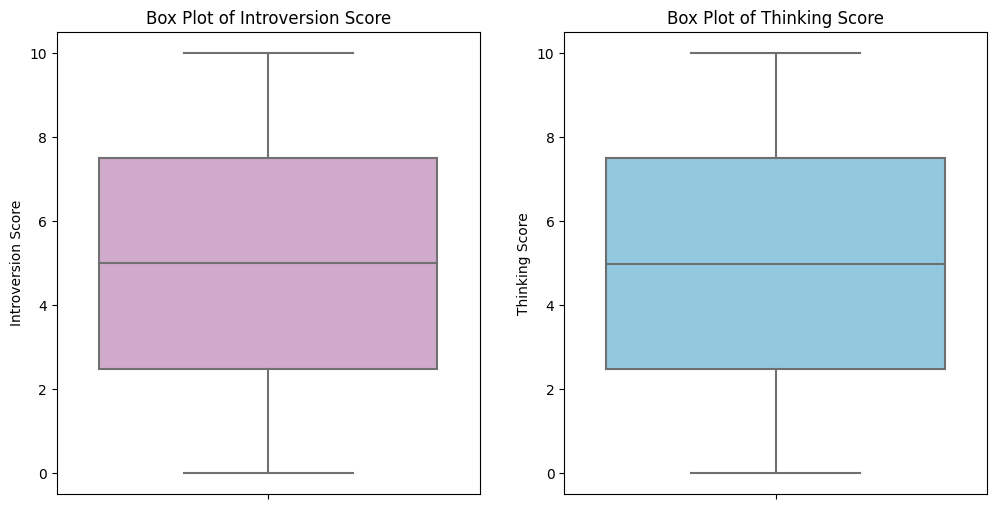

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='Introversion Score', data=df, color='#D6A4D0')
plt.title('Box Plot of Introversion Score')
plt.ylabel('Introversion Score')

plt.subplot(1, 2, 2)
sns.boxplot(y='Thinking Score', data=df, color='skyblue')
plt.title('Box Plot of Thinking Score')
plt.ylabel('Thinking Score')

Text(0, 0.5, 'Frequency')

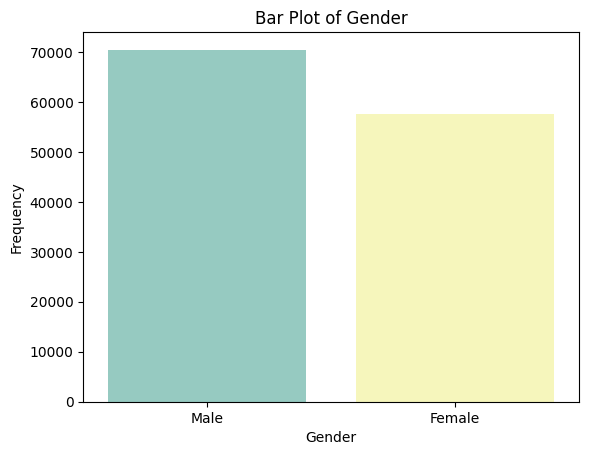

In [11]:
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

> **The dataset shows higher number of males than females.**

Text(0, 0.5, 'Frequency')

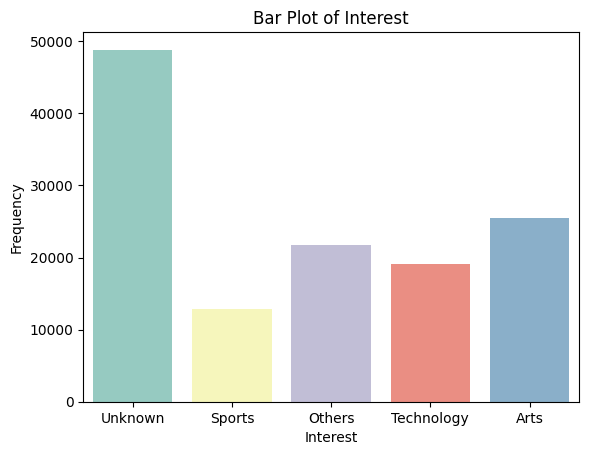

In [12]:
sns.countplot(x='Interest', data=df, palette='Set3')
plt.title('Bar Plot of Interest')
plt.xlabel('Interest')
plt.ylabel('Frequency')

> **Individuals in the dataset exhibit diverse interests.**

Text(0, 0.5, 'Frequency')

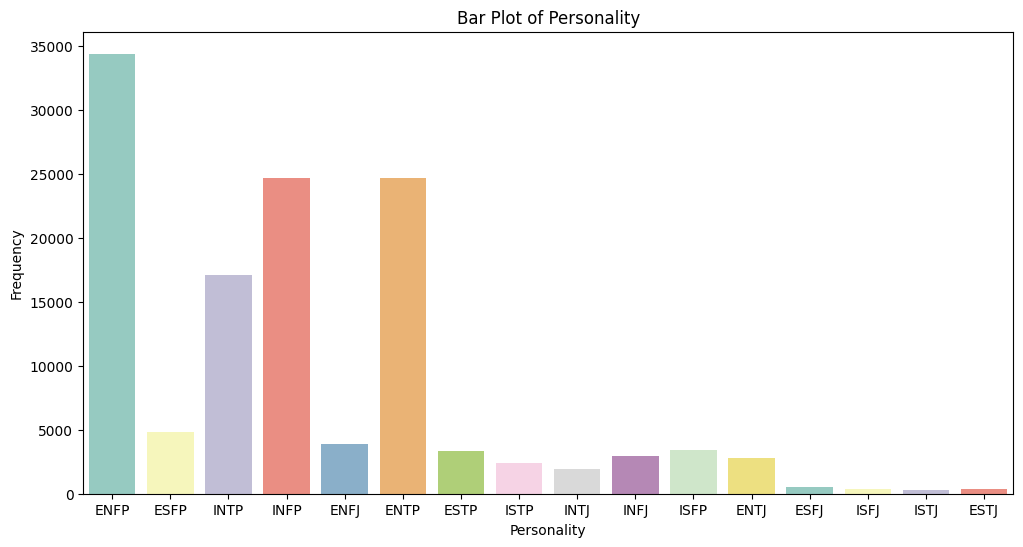

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x='Personality', data=df, palette='Set3')
plt.title('Bar Plot of Personality')
plt.xlabel('Personality')
plt.ylabel('Frequency')

In the personality barplot the alphabets stand for,

Extraversion (E) vs. Introversion (I): Focus on the outer world vs. the inner world.

Sensing (S) vs. Intuition (N): Preference for concrete information vs. abstract concepts.

Thinking (T) vs. Feeling (F): Preference for logic and objective criteria vs. personal values and emotions.

Judging (J) vs. Perceiving (P): Preference for structure and decisiveness vs. flexibility and spontaneity.

The most prevalent personality type in the dataset is characterized by Extraversion, Intuition, Feeling, and Perceiving (ENFP).
This is the univariate analysis of different variables where the histograms displays the age distribution of participants, the frequency of different sensing scores and judging scores.
The box plot visually summarizes the distribution of introversion scores and thinking scores displaying the median, quartiles and potential outliers.
Whereas the bar plots give us the gender distribution, varied interest of people and their different kinds of personalities.


# **MULTIVARIATE ANALYSIS**

Text(0, 0.5, 'Thinking Score')

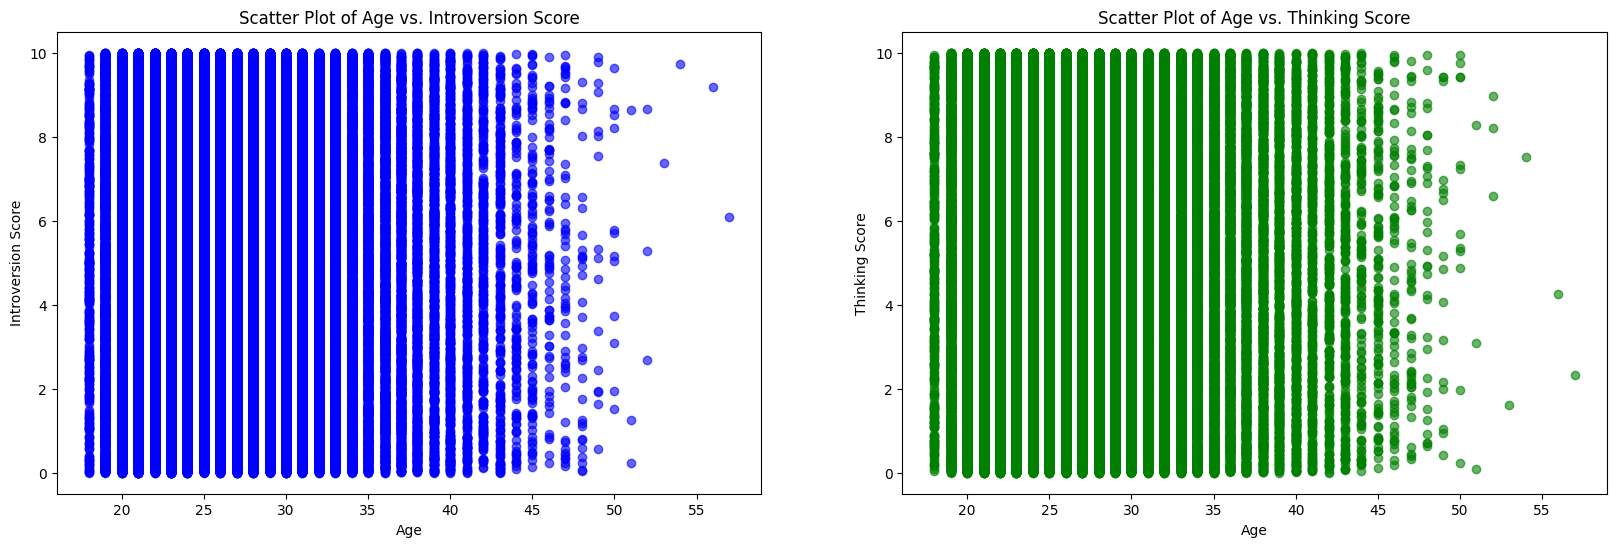

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Introversion Score'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs. Introversion Score')
plt.xlabel('Age')
plt.ylabel('Introversion Score')


plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['Thinking Score'], alpha=0.6, color='green')
plt.title('Scatter Plot of Age vs. Thinking Score')
plt.xlabel('Age')
plt.ylabel('Thinking Score')

These scatter plots provide insights into how age correlates with these psychological traits, which can be useful for personality predictions. You can assess that older individuals tend to score differently compared to younger ones.


Text(0, 0.5, 'Introversion Score')

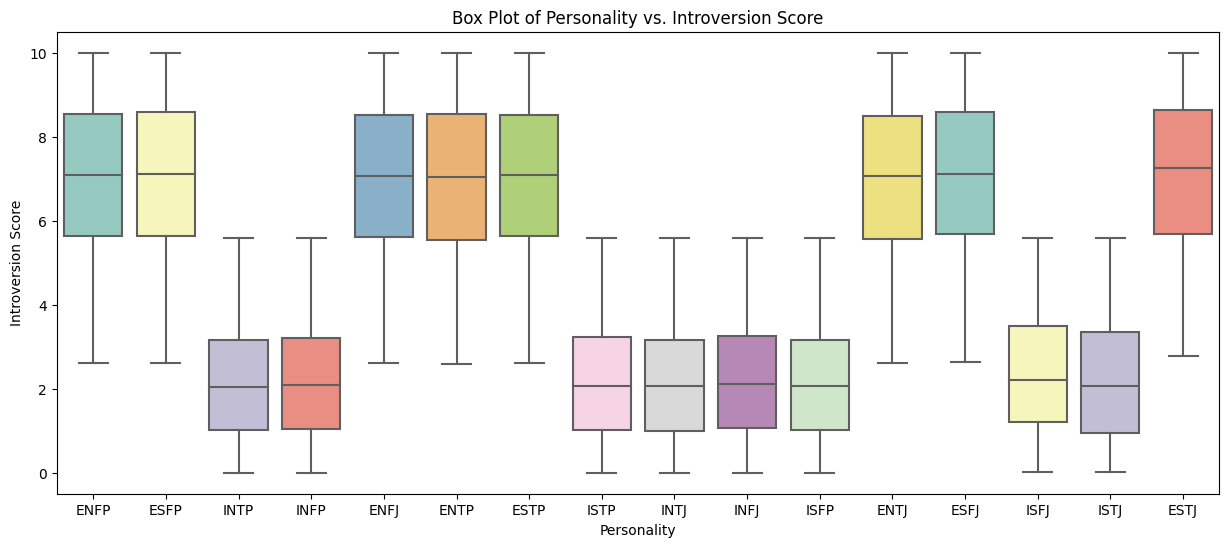

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Personality', y='Introversion Score', data=df, palette='Set3')
plt.title('Box Plot of Personality vs. Introversion Score')
plt.xlabel('Personality')
plt.ylabel('Introversion Score')



This plot visually compares the introversion scores across different personality types.It reveals how a certain personality types tend to be more introverted or extroverted on average.


In [16]:
correlation_matrix = df[['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']].corr()
print(correlation_matrix)

                         Age  Introversion Score  Sensing Score  \
Age                 1.000000           -0.000937      -0.003234   
Introversion Score -0.000937            1.000000      -0.000502   
Sensing Score      -0.003234           -0.000502       1.000000   
Thinking Score      0.001176            0.002818      -0.000781   
Judging Score       0.000412            0.000653      -0.001879   

                    Thinking Score  Judging Score  
Age                       0.001176       0.000412  
Introversion Score        0.002818       0.000653  
Sensing Score            -0.000781      -0.001879  
Thinking Score            1.000000       0.002091  
Judging Score             0.002091       1.000000  




The correlation values are very close to zero, suggesting little to no linear relationship between these variables.This can also be seen in the heatmap below.


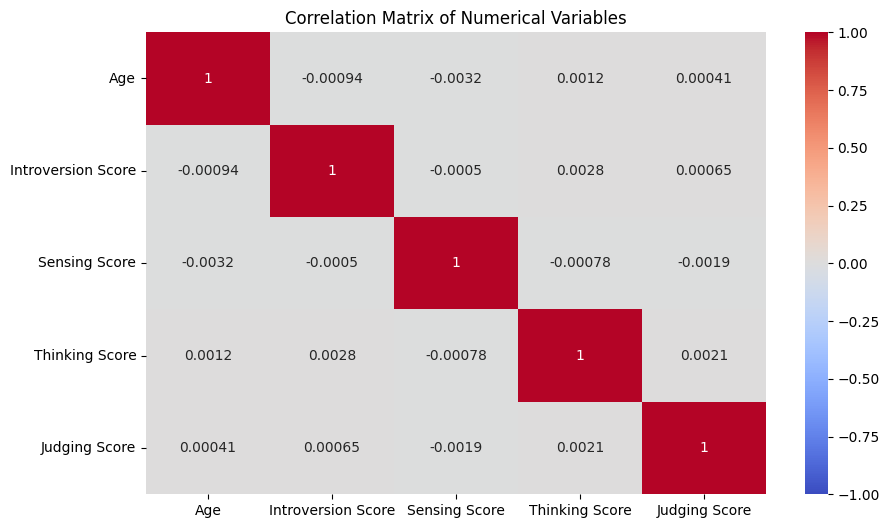

In [17]:
correlation_matrix = df[['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

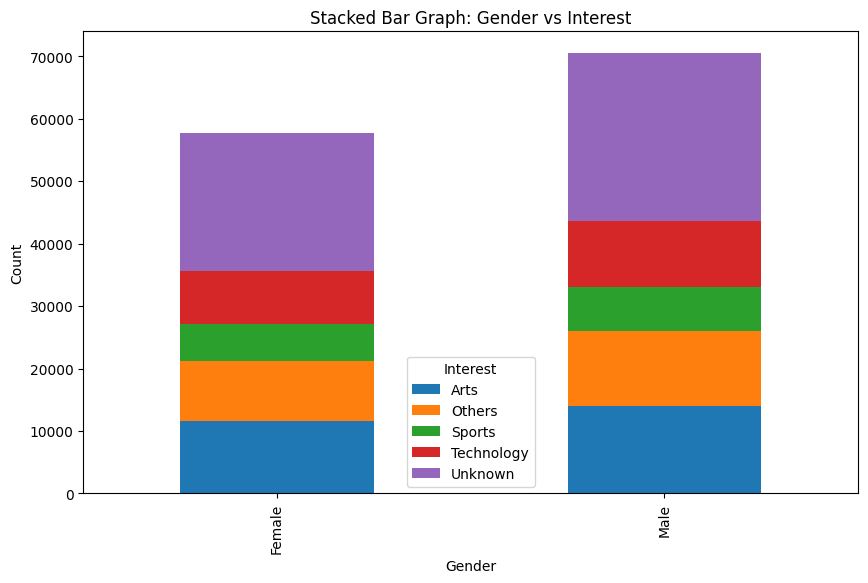

In [18]:
stacked_data = df.groupby(['Gender', 'Interest']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Graph: Gender vs Interest')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The dataset thus shows minimal correlation between personality traits (Introversion, Sensing, Thinking, Judging) and demographic factors like Age, Gender, or Education, suggesting these traits are innate.

The data is well-balanced across groups, making it suitable for future psychological or behavioral research. Univariate and multivariate analyses confirm the independence of personality traits from external influences.

